# Assignment 2: predict insurance charges
#### Application of linear regression, decision tree, random forests and gradient boosting

In this assignment you'll predict insurance charges using 6 attributes of customers of a health insurance company. The data is stored in inurance.csv.

### 1 Import libraries and dataset
- import the relevant libraries to load, analyze and visualize the data

In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

### 1A import and inspect files
- Load the csv file into a dataframe
- Inspect the dataframe

In [3]:
df = pd.read_csv('insurance.csv')
display(df.head(5))
display(df.info())
display(df.describe())
for col in df.columns:
    print(col,'Nan:', df[col].isna().sum(), '\nUnique: ', df[col].unique()) 


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


age Nan: 0 
Unique:  [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
sex Nan: 0 
Unique:  ['female' 'male']
bmi Nan: 0 
Unique:  [27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  

## 2 Convert to numeric and histograms


### 2A convert to numeric
- Three columns contain non-numeric data. Convert the data in these columns to numeric data.
- There are multiple ways to convert non-numeric data. One method is to use the Label Encoder in sklearn.

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

u_sex = df['sex'].unique()
n_sex = list(range(len(u_sex)))	


u_region = df['region'].unique()
n_region = list(range(len(u_region)))	


le.fit(df['smoker'].unique())
df['smoker'] = le.transform(df['smoker'])

df['sex'].replace(u_sex,n_sex, inplace=True)
df['region'].replace(u_region,n_region,inplace=True)
display(df.head(5))





,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


### 2B histograms
- Create a histogram of each variable in the dataset

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'sex'}>,
        <AxesSubplot: title={'center': 'bmi'}>],
       [<AxesSubplot: title={'center': 'children'}>,
        <AxesSubplot: title={'center': 'smoker'}>,
        <AxesSubplot: title={'center': 'region'}>],
       [<AxesSubplot: title={'center': 'charges'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

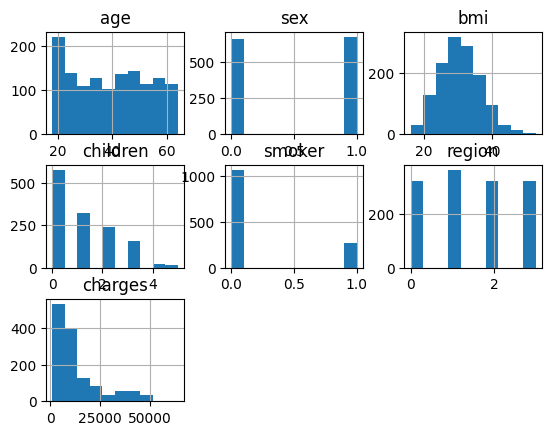

In [5]:
df.hist()

## 3 Correlations, heatmap and boxplots

### 3A correlations
- Create a bar chart that shows the correlations between the independent variables and the dependent variable (charges).

In [6]:
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['region'] = df['region'].astype('category')

df_corr = df.corr(numeric_only=True)
display(df_corr)




,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### 3B heat map
- Create a heat map that visualizes the correlations between all variables.

<AxesSubplot: >

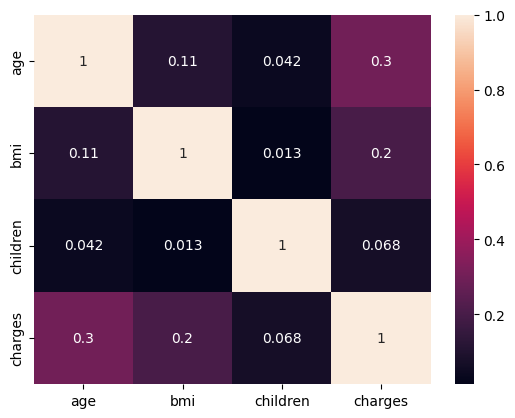

In [7]:
sns.heatmap(df_corr, annot=True)


### 3C Boxplots
- Create a chart that shows boxplots of all independent variables.

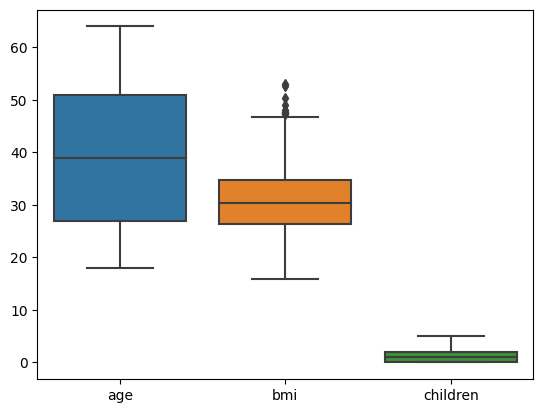

<AxesSubplot: >

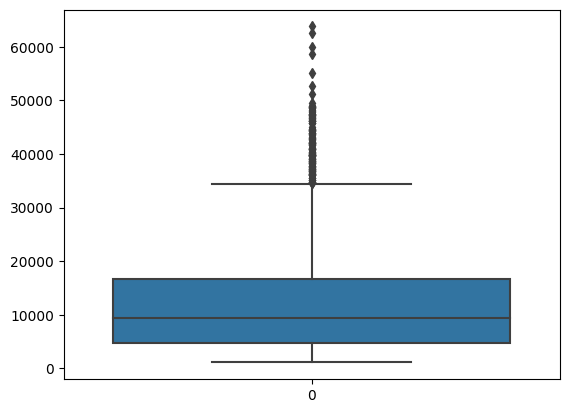

In [8]:
sns.boxplot(df[df.drop(columns = 'charges').columns.values])
plt.show()
sns.boxplot(df['charges'])

### 3D Outliers
- Which variable(s) have outliers? 
- Name 3 potential approaches to deal with these outliers. 
- What are the pro's and con's of each approach?

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

outliers charges = 2.54%
outliers bmi = 2.54%


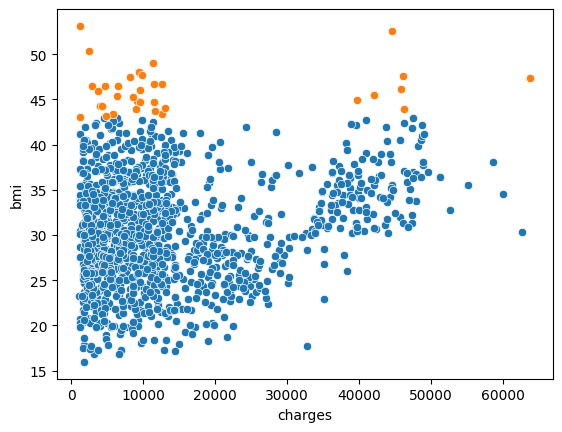

(1338, 7)

(1273, 7)

<AxesSubplot: xlabel='charges', ylabel='bmi'>

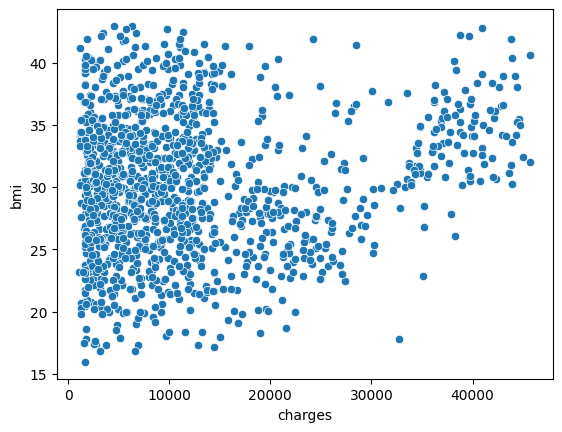

In [9]:
#bmi + charges
display(df['bmi'].describe())
# display(df[df['bmi'] >= df['bmi'].quantile(0.975)].sort_values('bmi'))
# display(df[df['charges'] >= df['charges'].quantile(0.975)].sort_values('bmi'))
bmi_outliers = df.loc[df['bmi'] >= df['bmi'].quantile(0.975),'bmi'].count()/len(df['charges'])*100
charges_outliers = df.loc[df['charges'] >= df['charges'].quantile(0.975),'charges'].count()/len(df['charges'])*100
print('outliers charges = %.2f%%' %charges_outliers)
print('outliers bmi = %.2f%%' %bmi_outliers)


sns.scatterplot(df[df['bmi'] < df['bmi'].quantile(0.975)], x='charges', y='bmi')
sns.scatterplot(df[df['bmi'] >= df['bmi'].quantile(0.975)], x='charges', y='bmi')
plt.show()

# de outliers kunnen worden verwijderd
df_adj = df[(df['charges'] < df['charges'].quantile(0.975)) &
                    (df['bmi'] < df['bmi'].quantile(0.975))]

display(df.shape)
display(df_adj.shape)
sns.scatterplot(df_adj, x='charges', y='bmi')

## 4 Linear models

### 4A train-test plit
- Split the data into a train set and a test set

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df_adj.drop(columns='charges')
y = df_adj['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4B Linear regression
- Apply linear regression to predict insurance charges.
- Determine the performance score of the training set
- Determine the performance score of the test set
- What are the regression coefficients? To what extent are they related to the correlation coefficients you found in the heatmap?

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

y_pred = l_reg.predict(X_test)

print('Performance training set', l_reg.score(X_train, y_train))

print('Performance test set', l_reg.score(X_test, y_test))

print('Regression =', mean_squared_error(y_test,y_pred, squared=False))

Performance training set 0.7033065460203651
Performance test set 0.7580967637382503
Regression = 5696.991701887838


### 4C Ridge
- Apply ridge regression to predict insurance charges. Run the ridge regression at least 4 times with different values of alpha. Each run should be in a different cell.
- Explain what the alpha parameter does. Show the regression coefficients of each of the 4 runs to illustrate your answer.
- Determine the accuracy of the train set and of the test set of each run.
- Explain your choice for each alpha value. 
- What alpha value is best? Explain your answer.

In [12]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
display(ridge.score(X_test, y_test))

0.7579852181009696

In [13]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
display(ridge.score(X_test, y_test))



0.7569685966748623

In [14]:
ridge = Ridge(alpha=0.01)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
display(ridge.score(X_test, y_test))

0.758085622094578

In [15]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
display(ridge.score(X_test, y_test))

0.7580956497032955

### 4D Lasso
- Apply lasso regression to predict insurance charges. Run the lass0 regression at least 4 times with different values of alpha. Each run should be in a different cell.
- Explain what the alpha parameter does. Show the regression coefficients and number of features used of each of the 4 runs to illustrate your answer.
- Determine the accuracy of the train set and of the test set of each run.
- Explain your choice for each alpha value. 
- What alpha value is best? Explain your answer.

In [16]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10)
lasso.fit(X_train,y_train)
lasso_pred = lasso.predict(X_test)
display(lasso.score(X_test, y_test))


0.7576316943446613

In [17]:
lasso = Lasso(alpha=20)
lasso.fit(X_train,y_train)
lasso_pred = lasso.predict(X_test)
display(lasso.score(X_test, y_test))

0.7571471057519276

In [18]:
lasso = Lasso(alpha=1)
lasso.fit(X_train,y_train)
lasso_pred = lasso.predict(X_test)
display(lasso.score(X_test, y_test))

0.7580511014583295

In [19]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
lasso_pred = lasso.predict(X_test)
display(lasso.score(X_test, y_test))

0.7580963070250111

## 5 Decision tree

### 5A Decision tree regressor
- Apply the decision tree regressor to predict insurance charges. Run the tree regressor at least 4 times with different values of the max_depth parameter. Each run should be in a different cell.
- Determine the accuracy of the train set and of the test set of each run.
- Explain what the max_depth parameter does. Compare training set accuracy with test set accuracy to illustrate your answer.
- With which settings does the model perform best? Explain your answer.

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import cross_val_score
regressor = DecisionTreeRegressor(min_samples_split=10, random_state=42)

display(np.mean(cross_val_score(regressor, X, y, cv=10, )))



0.7282422826912028

In [21]:
regressor = DecisionTreeRegressor(min_samples_split=100, random_state=42)

display(np.mean(cross_val_score(regressor, X, y, cv=10)))

0.7968410037989184

In [22]:
regressor = DecisionTreeRegressor(min_samples_split=1000, random_state=42)

display(np.mean(cross_val_score(regressor, X, y, cv=10)))

0.5735710312465606

In [23]:
regressor = DecisionTreeRegressor(min_samples_split=500, random_state=42)

display(np.mean(cross_val_score(regressor, X, y, cv=10)))

0.6584730893294237

### 5B Print tree
- Print the decision tree of the settings with the best performance.
Hint: use this link to find more information about printing decision trees: https://mljar.com/blog/visualize-decision-tree/
- Which variables are most important for predicting insurance charges? Explain your answer.

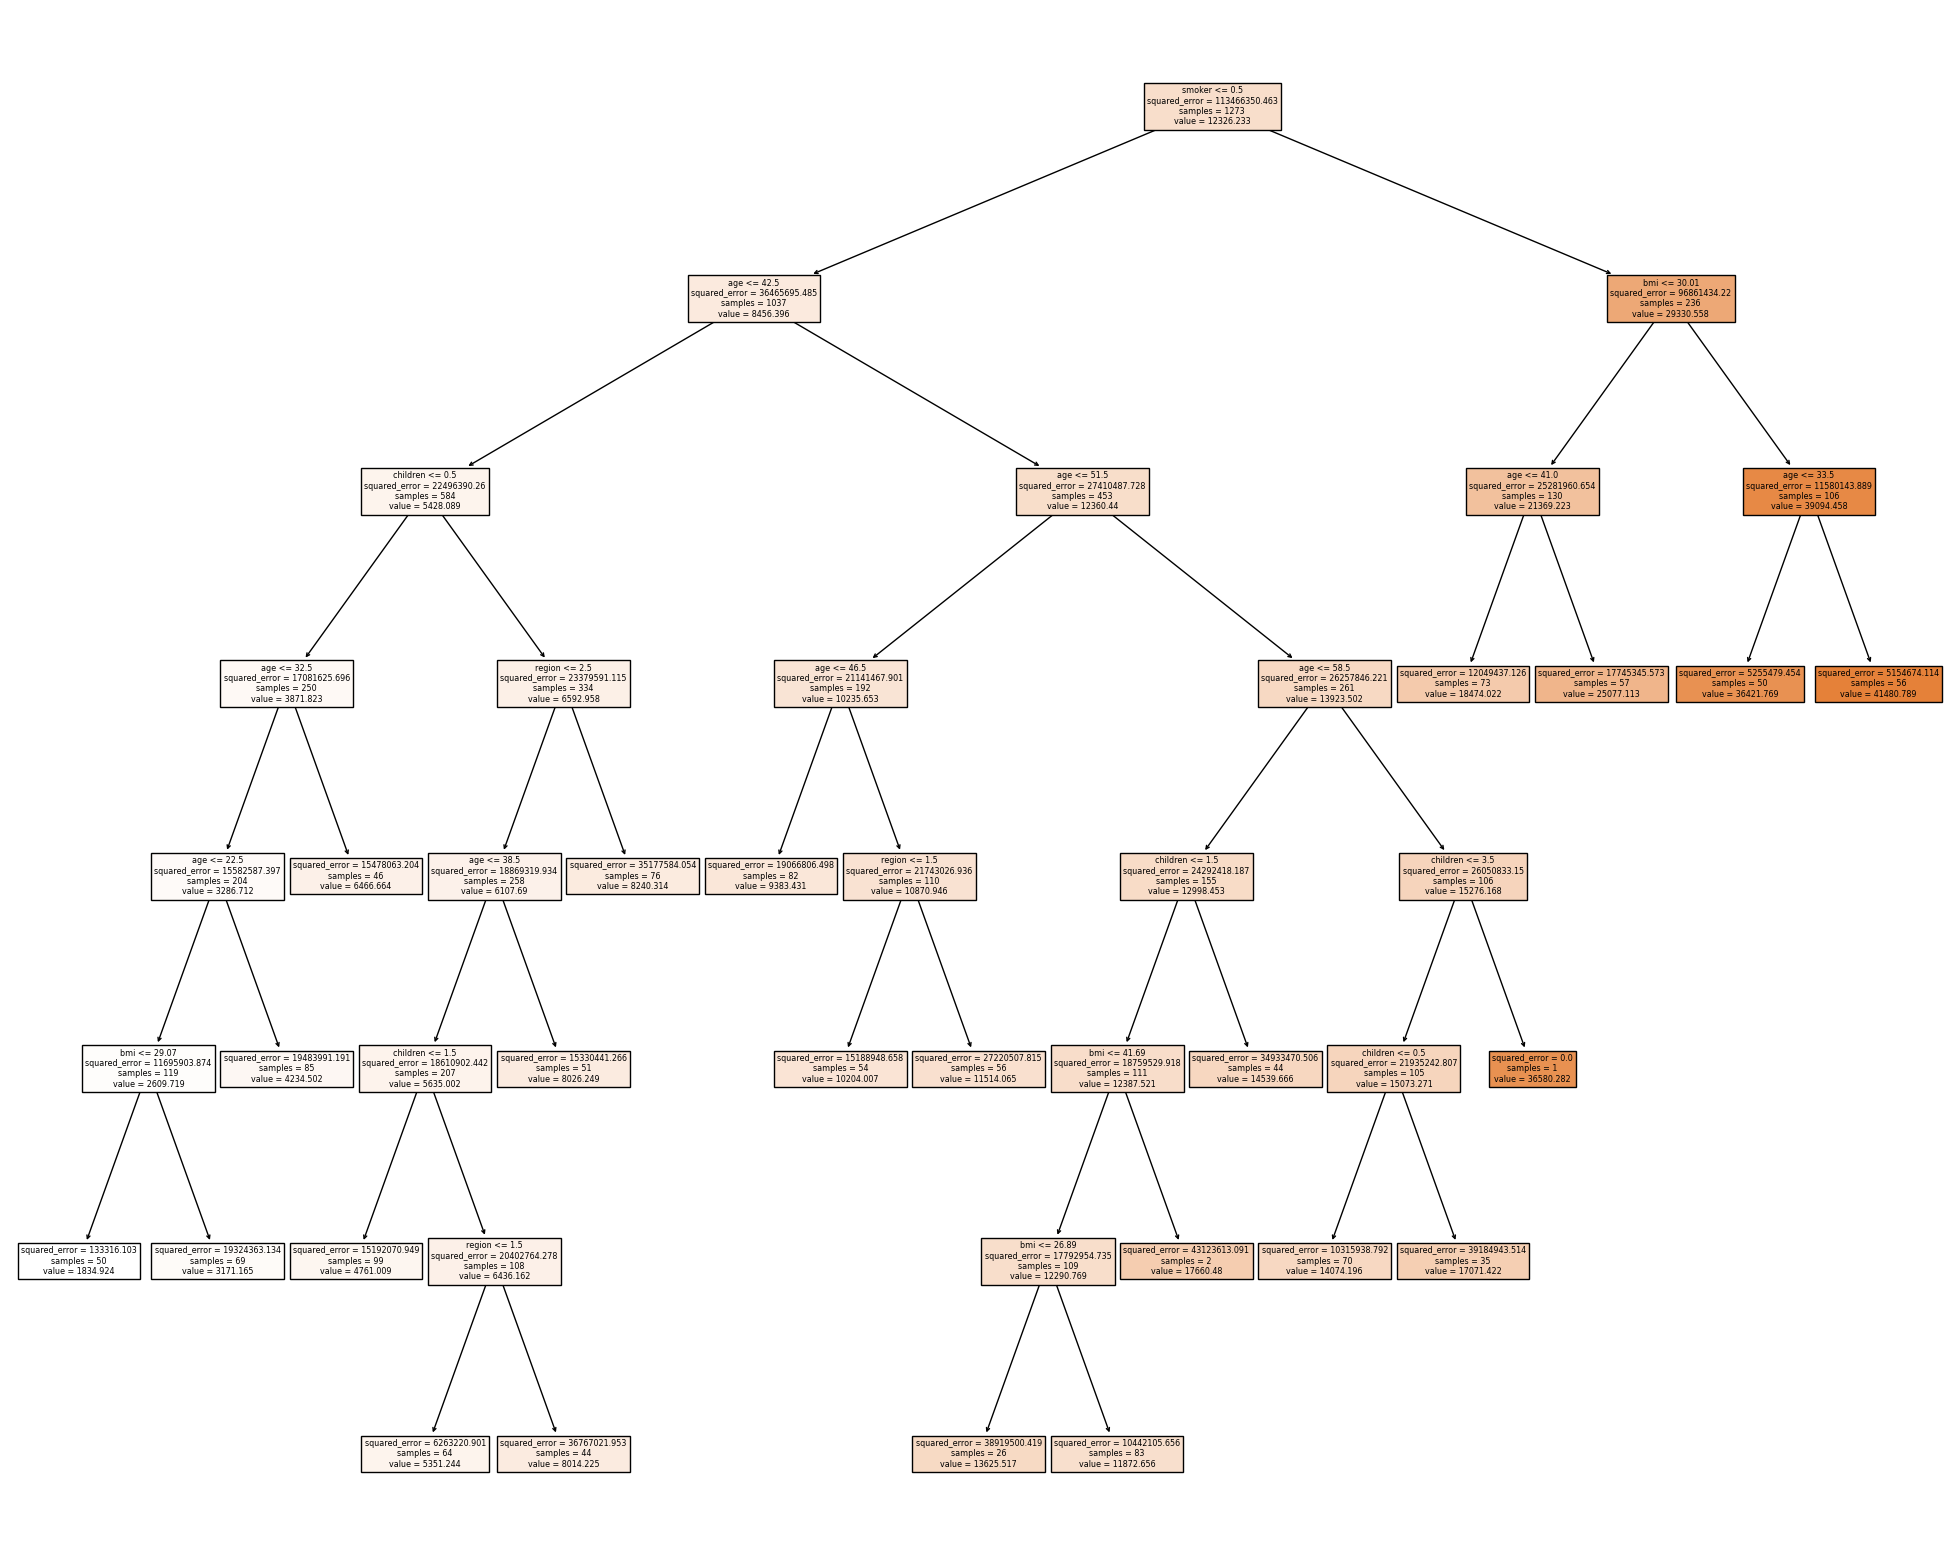

In [35]:
regressor = DecisionTreeRegressor(min_samples_split=100,max_depth=8, random_state=42)

model = regressor.fit(X, y)


fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regressor, 
                   feature_names=X.columns.values,  
                   class_names='charges',
                   filled=True)

#smoking

### 5C Feature importance
Do some research to find out about feature importance and how to determine this using sklearn. 
- What is feature importance of a decision tree?
- Determine and plot the feature importance of your model.

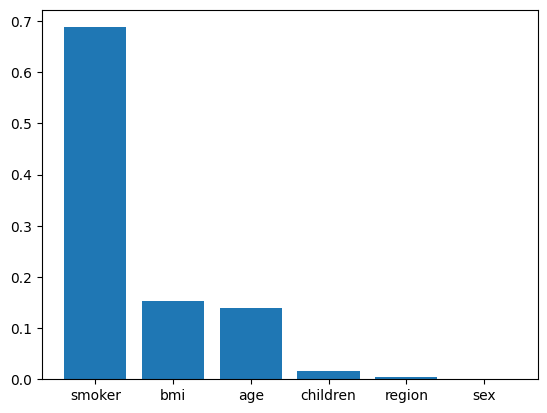

In [25]:
# In a decision tree, feature importance refers to a metric that measures how much each feature contributes to the model's predictions. 
# This is often calculated based on how much the tree nodes that use the feature reduce impurity, such as the Gini impurity or entropy. 
# The higher the importance of a feature, the more the model relies on it to make accurate predictions. 
# This can be useful for identifying the most important features in the data, and for understanding how the model is making its predictions.



importances = model.feature_importances_

# Sort the features by their importance
sorted_indexes = np.argsort(importances)[::-1]

# Create a bar plot of the sorted feature importances
plt.bar([X_train.columns[i] for i in sorted_indexes], importances[sorted_indexes])
plt.show()

## 6 Random forest

### 6A Random forest regressor
- Apply the random tree regressor to predict insurance charges. 
- Run the regressor with different values for the parameter that determines the number of trees. Which value returns the best result?
- Try some of the other parameters of the model. What is the impact of these parameters?
- Explain what the max_leaf_nodes parameter does? How does it impact the performance of your model?
- With which settings does the model perform best? Explain your answer.

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor()


# Make predictions on the test data
# result = list()
# for i in range(1,6):
#     estimator = 10**i
#     max_depth=5
#     model = RandomForestRegressor(n_estimators=estimator, max_depth=max_depth, n_jobs=-1)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     result.append({'Estimator':estimator,
#                    'Performance training set':model.score(X_train,y_train),
#                    'Performance test set':model.score(X_test,y_pred),
#                    'Mean error': mean_squared_error(y_test,y_pred, squared=False),
#                    'Mean squared error =': mean_squared_error(y_test,y_pred, squared=True)})

# result_df = pd.DataFrame(result)
# display(result_df)

# clf = RandomForestRegressor(n_estimators= 1000, oob_score = True, n_jobs = -1,random_state=42, max_features = 13, min_samples_leaf = 40)

# result = list()
# for i in range(1,10,1):
#     max_depth=5
#     model = RandomForestRegressor(n_estimators= 1000, oob_score = False, n_jobs = -1,random_state=42, max_features = 5, min_samples_leaf = i, max_leaf_nodes= 32)
#     # model = RandomForestRegressor(n_estimators=estimator, max_depth=max_depth, n_jobs=-1)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     result.append({'Leaf':i,
#                    'Performance training set':model.score(X_train,y_train),
#                    'Performance test set':model.score(X_test,y_pred),
#                    'Mean error': mean_squared_error(y_test,y_pred, squared=False),
#                    'Mean squared error =': mean_squared_error(y_test,y_pred, squared=True)})

# result_df = pd.DataFrame(result)
# display(result_df)

model = RandomForestRegressor(n_estimators= 1000, oob_score = False, n_jobs = -1,random_state=42, max_features = 5, min_samples_leaf = 5, max_leaf_nodes= 32)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Performance training set', model.score(X_train, y_train))
print('Performance test set', model.score(X_test, y_test))
print('Mean error =', mean_squared_error(y_test,y_pred, squared=False))
print('Mean squared error =', mean_squared_error(y_test,y_pred, squared=True))

  
    # sns.scatterplot(x=y_test, y=y_pred)
    # plt.title('Estimator = %d, max_depth = %d'%(estimator,max_depth))
    # plt.show()

# for i in range(2,5):
#     estimator = 10
#     max_depth=5*i
#     model = RandomForestRegressor(n_estimators=estimator, max_depth=max_depth)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     sns.scatterplot(x=y_test, y=y_pred)
#     plt.title('Estimator = %d, max_depth = %d'%(estimator,max_depth))
#     plt.show()


Performance training set 0.8597105388327745
Performance test set 0.8705074529963913
Mean error = 4168.186418575646
Mean squared error = 17373778.01999847


### 6B Feature importance
- Determine and plot the feature importance of your model.

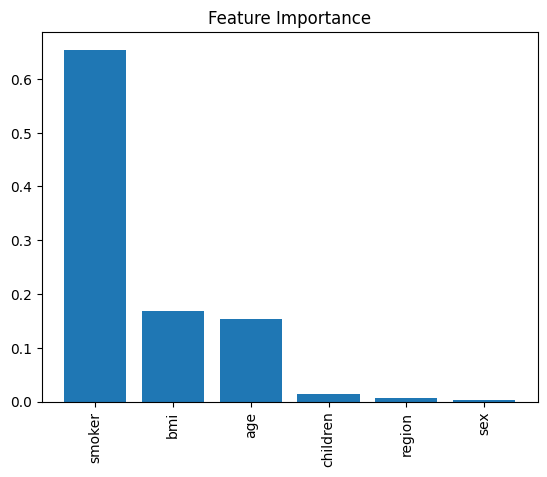

In [67]:
# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

names = [model.feature_names_in_[i] for i in indices]

plt.figure()

plt.title("Feature Importance")

plt.bar(range(X.shape[1]), importances[indices])


plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

## 7 Gradient boosting

### 7A Gradient Boosting regressor
- Apply the gradient boosting regressor to predict insurance charges. 
- Run the regressor with different values for the parameter that determines the depth of the trees. Which value returns the best result?
- Try some of the other parameters of the model. What is the impact of these parameters?
- Explain what the learning_rate parameter does? How does it impact the performance of your model?
- With which settings does the model perform best? Explain your answer.

In [69]:
# Train a gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

model = GradientBoostingRegressor()
# model.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = model.predict(X_test)
param_grid = {'max_depth': [2, 4, 6, 8, 10]}
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best value for max_depth
print(grid_search.best_params_)




{'max_depth': 2}


### 7B Feature importance
- Determine and plot the feature importance of your model.

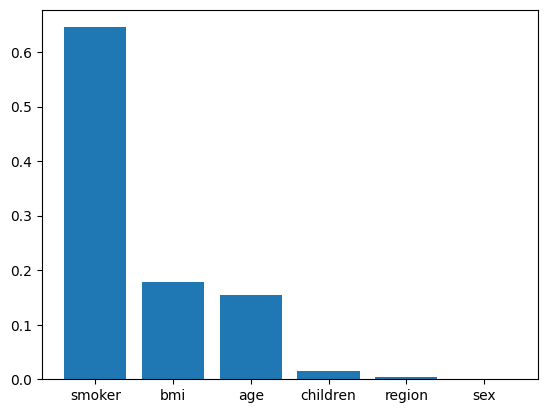

In [28]:
model.fit(X_train, y_train)


# Get the feature importances from the trained model
importances = model.feature_importances_

# Sort the features by their importance
sorted_indexes = np.argsort(importances)[::-1]

# Create a bar plot of the sorted feature importances
plt.bar([X_train.columns[i] for i in sorted_indexes], importances[sorted_indexes])
plt.show()